We will build a classifier that takes an image of a handwritten digit and outputs a label 0-9. We will look at a 
particularly simple strategy for this problem known as the nearest neighbor classifier.
To run this notebook we should have the following Python packages installed:
* numpy
* matplotlib
*sklearn`

# 1. The MNIST dataset
"MNIST" is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. 
The original training set contains 60,000 examples and the test set contains 10,000 examples. In this 
notebook we will be working with a subset of this data: a training set of 7500 examples and a test set of 
1,000 examples.

# About the dataset

Four files are available on this package:

* training set images
* training set labels
* test set images
* test set labels

These files are not in any standard image format. We have to write your own (very simple) program to read them. We can find more details about the dataset here: http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Load the training set:

In [2]:
train_data = np.load('../input/mnist/train_data.npy')
train_labels = np.load('../input/mnist/train_labels.npy')

## Load the testing set:

In [3]:
test_data = np.load('../input/mnist/test_data.npy')
test_labels = np.load('../input/mnist/test_labels.npy')

## Print out data dimensions:

In [4]:
print(type(train_data), type(train_labels), type(test_data), type(test_labels))

In [5]:
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", np.shape(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", np.shape(test_labels))

## Compute the number of examples of each digit:

In [6]:
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

# 2. Visualizing the data

Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image. 

To do this, we define a function that displays a digit given its vector representation:


In [7]:
def show_digit(x):
 plt.axis('off')
 plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
 plt.show()
 return

Define a function that takes an index into a particular data set ("train" or "test") and displays that image.

In [8]:
def vis_image(index, dataset="train"):
    if(dataset=="train"):
     show_digit(train_data[index,])
     label = train_labels[index]
    else:
     show_digit(test_data[index,])
     label = test_labels[index]
     print("Label " + str(label))
     return

View first 10 data points in the training set:

In [9]:
for i in range(10):
    vis_image(i, "train")

View the first data point in the test set:

In [10]:
vis_image(0, "test")

# 3. Squared Euclidean distance

* To compute nearest neighbors in our data set, we need to compute distances between data points. 
A natural distance function is Euclidean distance: for two vectors x, y, their Euclidean distance is 
defined as
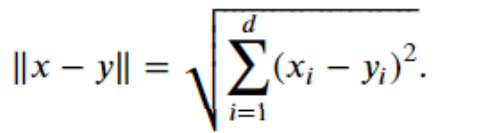
 
* Often we omit the square root, and simply compute squared Euclidean distance:
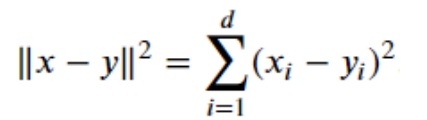

* We will compute squared Euclidean distance. The following function does so:

In [11]:
def squared_dist(x,y):
 return np.sum(np.square(x-y))

Compute distance between a seven and a one in our training set.

In [12]:
vis_image(4, "train")
vis_image(5, "train")
print("Distance from 7 to 1: ", squared_dist(train_data[4,],train_data[5,]))

Compute distance between a seven and a two in our training set.

In [13]:
vis_image(4, "train")
vis_image(1, "train")
print("Distance from 7 to 2: ", squared_dist(train_data[4,],train_data[1,]))

Compute distance between two seven's in our training set.

In [14]:
vis_image(4, "train")
vis_image(7, "train")
print("Distance from 7 to 7: ", squared_dist(train_data[4,],train_data[7,]))

# 4. Computing nearest neighbors
Now that we have a distance function defined, we can now turn to nearest neighbor classification.

Defining a function that takes a vector x and returns the index of its nearest neighbor in train_data.

In [15]:
def find_NN(x):

 # Compute distances from x to every row in train_data
 distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]

 # Get the index of the smallest distance
 return np.argmin(distances)

Function that takes a vector x and returns the class of its nearest neighbor in train_data.

In [16]:
def NN_classifier(x):

 # Get the index of the the nearest neighbor
 index = find_NN(x)

 # Return its class
 return train_labels[index]

## A success case:


In [20]:
print("A success case:")
print("NN classification: ", NN_classifier(test_data[0,]))
print("True label: ", test_labels[0])
print("The test image:")
vis_image(0, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[0,]), "train")

## A failure case:

In [18]:
print("A failure case:")
print("NN classification: ", NN_classifier(test_data[39,]))
print("True label: ", test_labels[39])
print("The test image:")
vis_image(39, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[39,]), "train")

# 5. Processing the full test set
* Let us apply our nearest neighbor classifier over the full data set.
* To classify each test point, our code takes a full pass over each of the 7500 training examples. Thus we should not expect testing to be very fast.
* Let us predict on each test data point (and time it!)

In [22]:
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
t_after = time.time()

## Compute the error:

In [23]:
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)
print("Error of nearest neighbor classifier: ", error)
print("Classification time (seconds): ", t_after - t_before)

# 6. Faster nearest neighbor methods
* Performing nearest neighbor classification in the way we have presented requires a full pass through 
the training set in order to classify a single point. If there are training points in ℝd , this takes 
O(Nd) time.
* Fortunately, there are faster methods to perform nearest neighbor. "scikit-learn" has fast 
implementations of two useful nearest neighbor data structures: the ball tree and the k-d tree.

In [27]:
from sklearn.neighbors import BallTree

# Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
print(ball_tree)
t_after = time.time()

# Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

# Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
print(test_neighbors)
ball_tree_predictions = train_labels[test_neighbors]
print(ball_tree_predictions)
t_after = time.time()

# Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

# Verify that the predictions are the same
print("Ball tree produces same predictions as above? ", np.array_equal(test_predictions, ball_tree_predictions))

In [28]:
from sklearn.neighbors import KDTree

# Build nearest neighbor structure on training data
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

# Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

# Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

# Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

# Verify that the predictions are the same
print("KD tree produces same predictions as above? ", np.array_equal(test_predictions, kd_tree_predictions))